In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
d1 = pd.read_csv('USC_Discrete_Target_Dataset.csv')

In [74]:
# Column names 
d1.columns

Index(['BUS__CODE', 'SCORE', 'A_GrossSales', 'A_ExtaxPurch', 'A_Resales',
       'A_FoodCosts', 'A_LaborCosts', 'A_IOC', 'A_BadDebts', 'A_TOPP',
       'A_SalesFinal', 'OwnCode', 'Status', 'Y_AuditResult'],
      dtype='object')

In [90]:
# Number of Rows and Number of Columns 
d1.shape

(14112, 14)

In [75]:
# Columns datatype
d1.dtypes

BUS__CODE          int64
SCORE            float64
A_GrossSales     float64
A_ExtaxPurch     float64
A_Resales        float64
A_FoodCosts      float64
A_LaborCosts     float64
A_IOC            float64
A_BadDebts       float64
A_TOPP           float64
A_SalesFinal     float64
OwnCode            int64
Status             int64
Y_AuditResult     object
dtype: object

In [76]:
d1.head(5)

,BUS__CODE,SCORE,A_GrossSales,A_ExtaxPurch,A_Resales,A_FoodCosts,A_LaborCosts,A_IOC,A_BadDebts,A_TOPP,A_SalesFinal,OwnCode,Status,Y_AuditResult
0,1,0.190060,0.061679,0.066138,0.056952,0.056386,0.040065,0.049699,0.032031,0.022732,0.046738,0,1,Not_Success
1,5,0.190060,0.350000,0.297216,0.234331,0.292740,0.252073,0.000000,0.302926,0.304454,0.288876,0,1,Not_Success
2,5,0.190060,0.268717,0.312500,0.345161,0.292740,0.315652,0.258993,0.302926,0.324324,0.288876,0,1,Success
3,5,0.190060,0.267081,0.170758,0.345161,0.292740,0.315652,0.316640,0.302926,0.304454,0.288876,0,1,Not_Success
4,6,0.220606,0.421769,0.312500,0.909091,0.292740,0.315652,0.316640,0.302926,0.304454,0.288876,1,1,Success


In [77]:
# Dictionary to convert target to numeric 
dict1 = {'Not_Success':1, 'Success': 0}

In [78]:
# Convert target value to numeric 
d1['Y_AuditResult'] = d1['Y_AuditResult'].map(dict1)

In [79]:
d1.head(5)

,BUS__CODE,SCORE,A_GrossSales,A_ExtaxPurch,A_Resales,A_FoodCosts,A_LaborCosts,A_IOC,A_BadDebts,A_TOPP,A_SalesFinal,OwnCode,Status,Y_AuditResult
0,1,0.190060,0.061679,0.066138,0.056952,0.056386,0.040065,0.049699,0.032031,0.022732,0.046738,0,1,1
1,5,0.190060,0.350000,0.297216,0.234331,0.292740,0.252073,0.000000,0.302926,0.304454,0.288876,0,1,1
2,5,0.190060,0.268717,0.312500,0.345161,0.292740,0.315652,0.258993,0.302926,0.324324,0.288876,0,1,0
3,5,0.190060,0.267081,0.170758,0.345161,0.292740,0.315652,0.316640,0.302926,0.304454,0.288876,0,1,1
4,6,0.220606,0.421769,0.312500,0.909091,0.292740,0.315652,0.316640,0.302926,0.304454,0.288876,1,1,0


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy

# Separate the Train and Test sets by 4:1
X = d1.iloc[:,0:-1]
Y = d1.loc[:,'Y_AuditResult']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [81]:
# Fit the Logistic Regression using train set.
clf = LogisticRegression(random_state=0, penalty = 'l1',solver='liblinear').fit(x_train, y_train)

# Use the model to get the predict values
y_pred = clf.predict(x_test)

In [83]:
# print the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 131,  414],
       [  46, 2232]])

Text(0.5, 15.0, 'Predicted label')

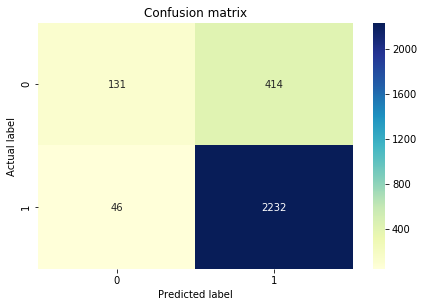

In [85]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))

Accuracy: 0.837
Precision: 0.844
Recall: 0.98


In [87]:
# Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=10)
scores

array([0.83613818, 0.82462356, 0.83879539, 0.83702391, 0.82816652,
       0.83613818, 0.83525244, 0.83170948, 0.83790965, 0.83421986])

In [88]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.01)
